In [1]:

%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import feature
import skimage.feature
from skimage.feature import hog
import random

In [2]:
# ### Add noise ###
# # 椒盐噪声
# # 1.读取图像
# image = cv2.imread('lena.png')
# w, h, c = image.shape
# # 2.设置添加噪声比例
# prob_salt = 0.01
# prob_pepper = 0.01
# # 3.依据比例逐点添加噪声
# image_sp = image.copy()
# for i in range(w):
#     for j in range(h):
#         p = random.random() # 随机数生成
#         if p < prob_salt:
#             image_sp[i, j, :] = image_sp[i, j, :]*0 + 255
#         elif p > (1-prob_pepper):
#             image_sp[i, j, :] = image_sp[i, j, :]*0
# cv2.imwrite('./image_sp.png', image_sp)
# # 高斯噪声
# # 1.读取图像
# image = cv2.imread('lena.png')
# w, h, c = image.shape
# # 2.生成高斯噪声
# mean = 0
# sigma = 10.0
# gauss = np.random.normal(mean,sigma,(w,h,c))
# # 3.合成含噪声图像
# image_gau = image.copy() + gauss
# # 4.设置图片添加高斯噪声之后的像素值的范围
# image_gau = np.clip(image_gau, a_min=0, a_max=255)
# cv2.imwrite('./image_gau.png', image_gau)
# # 泊松噪声
# # 1.读取图像
# image = cv2.imread('lena.png')
# w, h, c = image.shape
# # 2.给图片添加泊松噪声
# image_pos = np.random.poisson(image.copy())
# cv2.imwrite('./image_pos.png', image_pos)

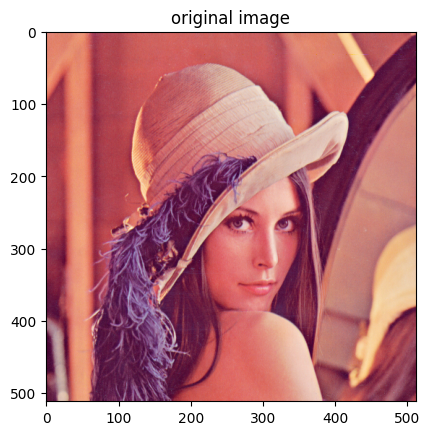

In [3]:
######## Image Read ######### 
imgScr = cv2.imread('lena.png')
imgRGB = cv2.cvtColor(imgScr, cv2.COLOR_BGR2RGB)
plt.figure()
plt.title('original image')
plt.imshow(imgRGB)  

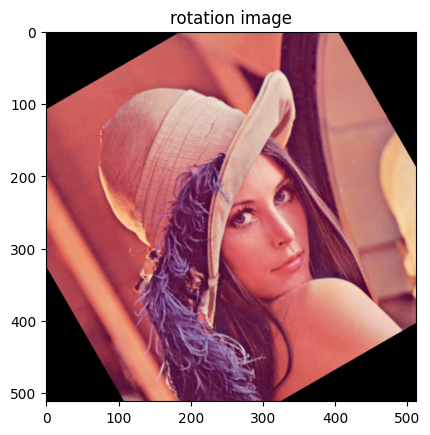

In [4]:
######### Rotation ######### 

# PARAMETER
ANGLE = 30

# PROCESS
image_center = tuple(np.array(imgRGB.shape[1::-1]) / 2)
rot_mat = cv2.getRotationMatrix2D(image_center, ANGLE, 1.0)
result = cv2.warpAffine(imgRGB, rot_mat, imgRGB.shape[1::-1], flags=cv2.INTER_LINEAR)
plt.figure()
plt.title('rotation image')
plt.imshow(result)


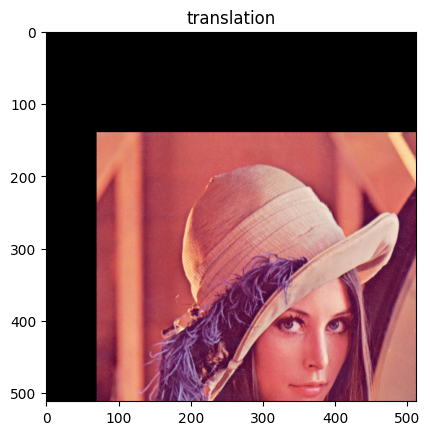

In [5]:
######### Translation #########
translation_matrix = np.float32([[1,0,70],[0,1,140]])
result = cv2.warpAffine(imgRGB,translation_matrix,imgRGB.shape[1::-1],flags=cv2.INTER_LINEAR)
plt.figure()
plt.title('translation')
plt.imshow(result)

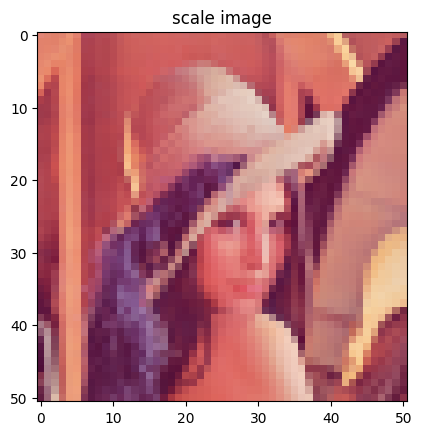

In [6]:
######### SCALE #########

scale_percent = 10       # percent of original size
width = int(imgRGB.shape[1] * scale_percent / 100)
height = int(imgRGB.shape[0] * scale_percent / 100)
dim = (width, height)
result = cv2.resize(imgRGB, dim, interpolation = cv2.INTER_AREA)
plt.figure()
plt.title('scale image')
plt.imshow(result)

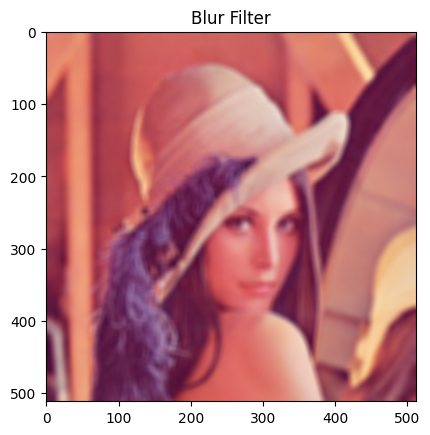

In [7]:
######## FILTER ########

# PARAMETTER
ksize = (10,10)

# PROCESS
result = cv2.blur(imgRGB,ksize)
plt.figure()
plt.title('Blur Filter')
plt.imshow(result)

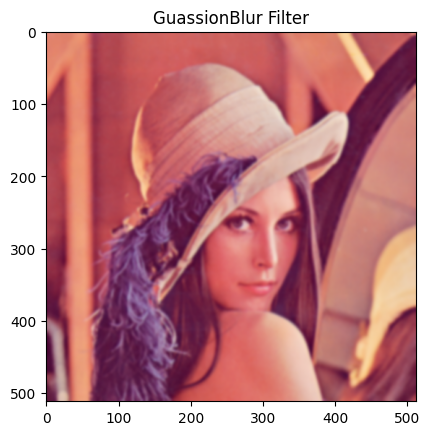

In [8]:
# PARAMETER
ksize = (9,9)
sigma = 0
result = cv2.GaussianBlur(imgRGB,ksize,sigma)
plt.figure()
plt.title('GuassionBlur Filter')
plt.imshow(result)

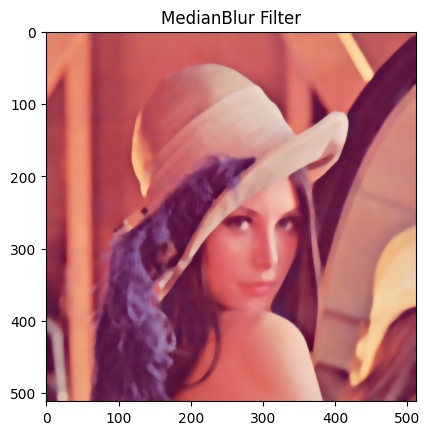

In [9]:
# PARAMETER
ksize = 9

result = cv2.medianBlur(imgRGB,ksize)
plt.figure()
plt.title('MedianBlur Filter')
plt.imshow(result)

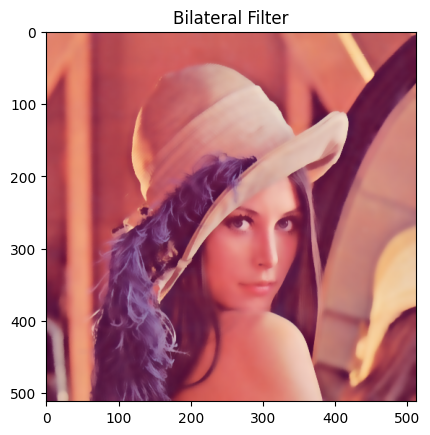

In [10]:
# PARAMETER
ksize = 10 
sigmaX = 100
sigmaY = 100

result = cv2.bilateralFilter(imgRGB,ksize,sigmaX,sigmaY)
plt.figure()
plt.title('Bilateral Filter')
plt.imshow(result)

(512, 512)


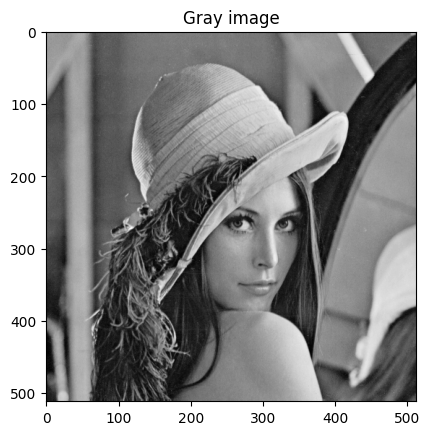

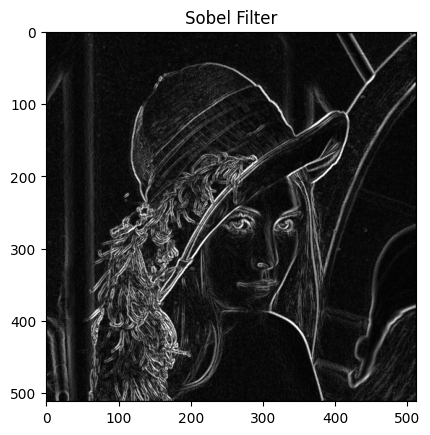

In [11]:
gray = cv2.cvtColor(imgScr, cv2.COLOR_BGR2GRAY)
plt.figure()
plt.title('Gray image')
plt.imshow(gray,cmap='gray')
x = cv2.Sobel(imgRGB,cv2.CV_16S,1,0)
y = cv2.Sobel(imgRGB,cv2.CV_16S,0,1)

absX = cv2.convertScaleAbs(x)
absY = cv2.convertScaleAbs(y)
_result = cv2.addWeighted(absX,0.5,absY,0.5,0)
result = cv2.cvtColor(_result, cv2.COLOR_RGB2GRAY)
print(np.shape(result))
plt.figure()
plt.title('Sobel Filter')
plt.imshow(result,cmap='gray')

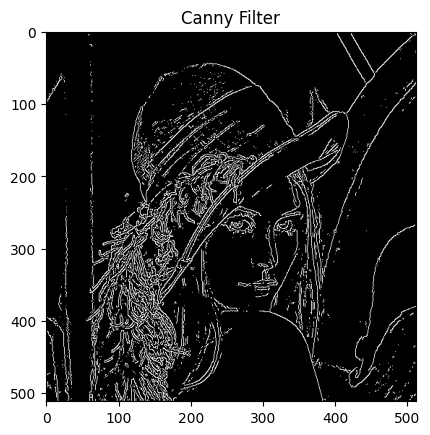

In [12]:
######### CANNY #########
_result = cv2.cvtColor(imgScr, cv2.COLOR_BGR2GRAY)
result = cv2.Canny(_result,100,100)
plt.figure()
plt.title('Canny Filter')
plt.imshow(result,cmap='gray')

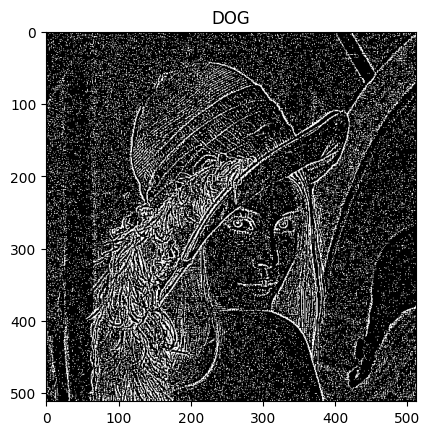

In [20]:
gua_blur_1 = cv2.GaussianBlur(gray,ksize=(3,3),sigmaX=1.0,sigmaY=1.0)
gua_blur_2 = cv2.GaussianBlur(gray,ksize=(3,3),sigmaX=10.0,sigmaY=10.0)
dog_img = gua_blur_1 - gua_blur_2
plt.title('DOG')
plt.imshow(dog_img,cmap='gray')

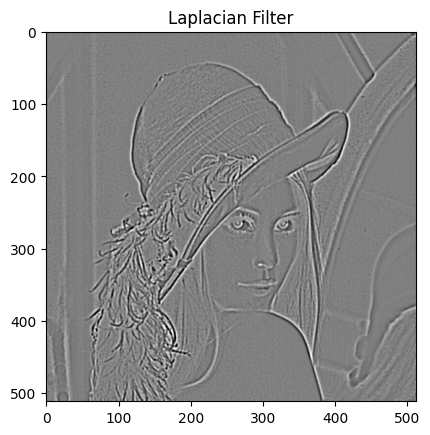

In [14]:
_result = cv2.cvtColor(imgScr, cv2.COLOR_BGR2GRAY)
result = cv2.Laplacian(_result,cv2.CV_16S,ksize = 7)
plt.figure()
plt.title('Laplacian Filter')
plt.imshow(result,cmap='gray')

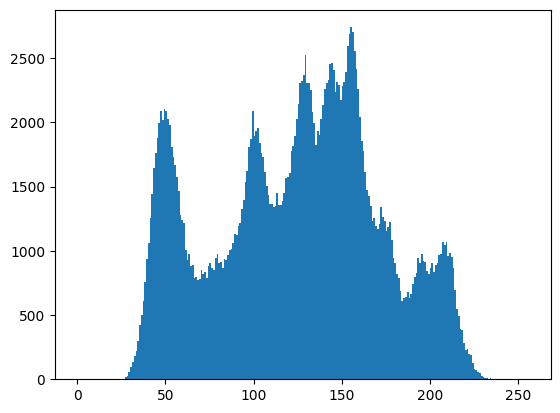

In [15]:
plt.hist(gray.ravel(),256,[0,256])
plt.show('Gray Hist')

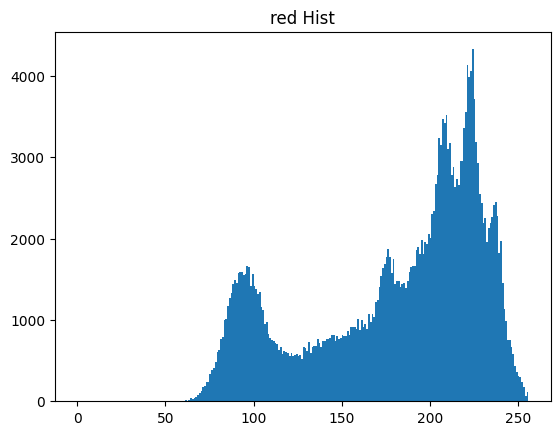

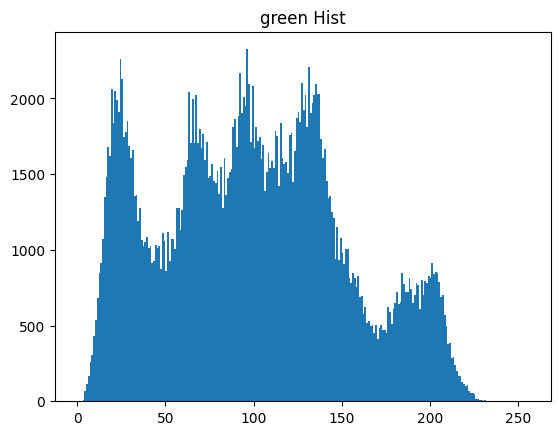

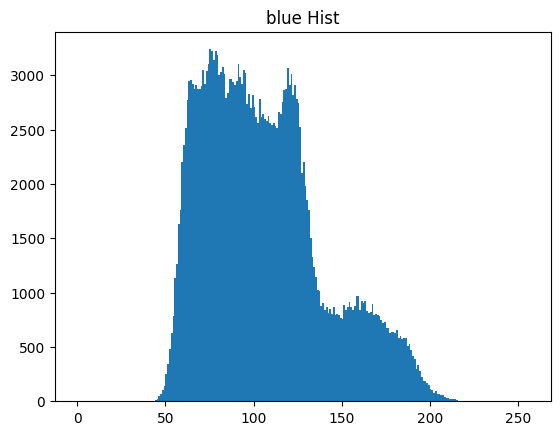

In [16]:
colors = ['red','green','blue']
for index, color in enumerate(colors):
    plt.hist(imgRGB[:,:,index].ravel(),256,[0,256])
    plt.title(f'{colors[index]} Hist')
    plt.show()

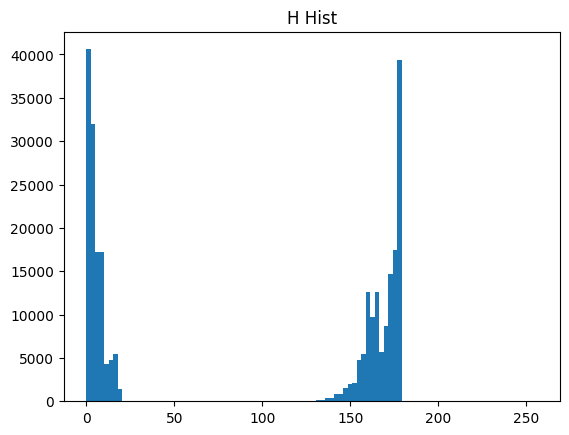

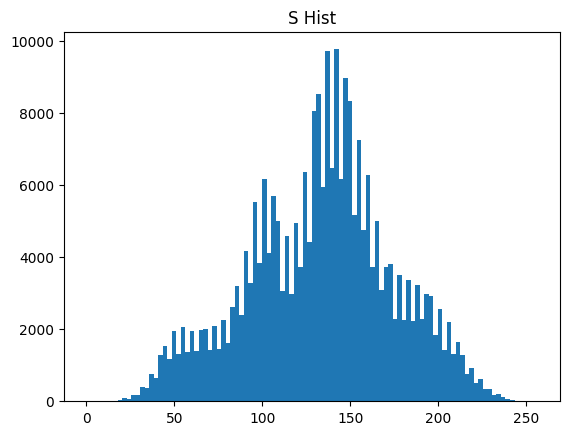

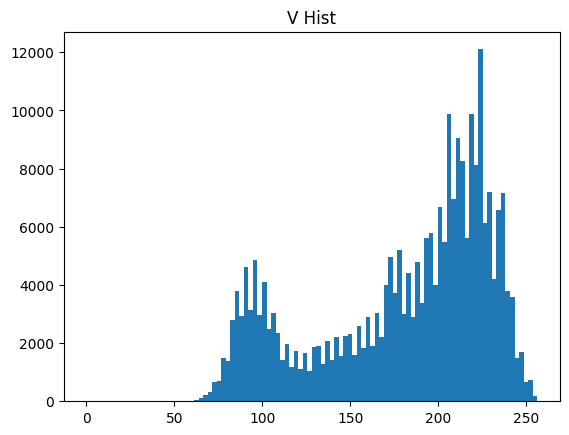

In [17]:
colors = ['H', 'S', 'V']
imgHSV = cv2.cvtColor(imgScr,cv2.COLOR_BGR2HSV)
for index ,color in enumerate(colors):
    plt.hist(imgHSV[:,:,index].ravel(),100,[0,256])
    plt.title(f'{colors[index]} Hist')
    plt.show()

[[  0.          0.          0.        ...   0.          0.
    0.       ]
 [  0.          0.          0.        ...   0.          0.
    0.       ]
 [  0.          0.          0.        ...   0.          0.
    0.       ]
 ...
 [ 90.        164.05206    51.34251   ...  90.        130.60556
   90.       ]
 [ 90.          5.1936326  35.53036   ...   0.         51.34251
   90.       ]
 [  0.          0.          0.        ...   0.          0.
    0.       ]]


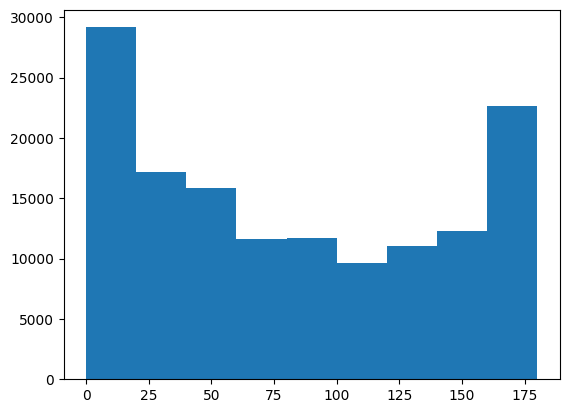

In [18]:
gx = cv2.Sobel(gray, cv2.CV_32F, 1, 0, ksize=1)
gy = cv2.Sobel(gray, cv2.CV_32F, 0, 1, ksize=1)
mag, angle = cv2.cartToPolar(gx, gy, angleInDegrees=True)
print(np.where(angle>=180,angle-180,angle))
_angle = np.array(cv2.split(angle))
plt.hist(_angle.ravel(),9,[0,180])
plt.show()
